In [ ]:
import sympy 
import math
def is_prime(n):
        return sympy.isprime(n)
def round_sqrt(n):
    return math.floor(math.sqrt(n))

def multiply(n,m):
    multiplication=36*n
    if is_prime(multiplication+1):
        return True,"plus",f"36 * {n} +1 is prime:{multiplication+1}"
    if is_prime(multiplication-1):
        return True,"minus",f"36 * {n} -1 is prime :{multiplication+1}"
    return False,None,None
    
limit=100000
primes=list(sympy.sieve.primerange(sympy.prime(limit) + 1))
success={}
plus={}
minus={}
multipliers=[6,36]
for multi in multipliers:
    for prime in primes:
        isprime,operation,msg=multiply(prime,multi)
        if isprime:
            success[mulit]+=1
            if operation=="plus":
                plus+=1
            else:
                minus+=1
        print(msg)
    print(f"global success rate : {(success/limit)*100}% plus of success : {(plus/success)*100}%, plus of minus : {(minus/success)*100}%")

36 * 2 +1 is prime:73
36 * 3 +1 is prime:109
36 * 5 +1 is prime:181
36 * 7 -1 is prime :253
36 * 11 +1 is prime:397
36 * 13 -1 is prime :469
36 * 17 +1 is prime:613
36 * 19 -1 is prime :685
36 * 23 +1 is prime:829
None
36 * 31 +1 is prime:1117
None
None
36 * 43 +1 is prime:1549
36 * 47 +1 is prime:1693
36 * 53 -1 is prime :1909
None
None
36 * 67 -1 is prime :2413
36 * 71 +1 is prime:2557
None
36 * 79 -1 is prime :2845
None
36 * 89 -1 is prime :3205
36 * 97 -1 is prime :3493
36 * 101 +1 is prime:3637
36 * 103 +1 is prime:3709
36 * 107 +1 is prime:3853
36 * 109 -1 is prime :3925
None
None
None
36 * 137 +1 is prime:4933
36 * 139 -1 is prime :5005
None
36 * 151 +1 is prime:5437
36 * 157 +1 is prime:5653
36 * 163 +1 is prime:5869
36 * 167 -1 is prime :6013
36 * 173 +1 is prime:6229
None
None
None
36 * 193 +1 is prime:6949
None
None
None
None
36 * 227 -1 is prime :8173
36 * 229 -1 is prime :8245
36 * 233 +1 is prime:8389
None
36 * 241 +1 is prime:8677
None
None
36 * 263 -1 is prime :9469
Non

In [32]:
import sympy
import time
import pandas as pd
import sys
from tqdm import tqdm

sys.set_int_max_str_digits(0)

def is_prime(n):
    return sympy.isprime(n)

def find_twin_primes_your_method(number, limit,divisor=2):
    twin_primes = []
    primes_found = []
    maximum = 0

    for n in tqdm(range(number, limit, number), desc="Finding Twin Primes"):
        if n & 1 == 0:
            a = n // divisor
            p1 = a * n - 1
            p2 = a * n + 1

            if p1 % 6 == 1 or p1 % 6 == 5:
                is_prime1 = is_prime(p1)
                if is_prime1:
                    primes_found.append(p1)
                    if p1 > maximum:
                        maximum = p1
                is_prime2 = is_prime(p2)
                if is_prime2:
                    primes_found.append(p2)
                    if p2 > maximum:
                        maximum = p2
                    if(is_prime1):
                        twin_primes.append((p1, p2))

            #if 'is_prime1' in locals() and 'is_prime2' in locals() and is_prime1 and is_prime2 and p2 - p1 == 2:
                #twin_primes.append((p1, p2))

    return twin_primes, primes_found, maximum

def test_method(method, number, limit,divisior):
    start_time = time.time()
    twin_primes, primes_found, maximum = method(number, limit,divisior)
    end_time = time.time()
    return len(twin_primes), end_time - start_time, maximum, twin_primes, primes_found

def primes_info():
    while True:
        try:
            n = int(input("Enter the number of primes p# (n): "))
            if n > 0:
              divisor = int(input("Enter integer divisior "))
              if divisor > 0:
                  break
              else:
                print("Please enter a positive integer.")
            else:
                print("Please enter a positive integer.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

    primes = [sympy.prime(i) for i in range(1, n + 1)]
    product = sympy.prod(primes)
    sys.set_int_max_str_digits(0)
    num_digits = len(str(product))

    print(f"Their product is: {product}")
    print(f"The number of digits in the product is: {num_digits}")
    return product, num_digits,divisor

def main():
    number, digits,divisor = primes_info()
    limit = 10**(digits + 4)
    
    print(f"In the range between the primordial: {number} and {limit}")
    print(limit // number, "numbers will be tested for primes")

    count_your_method, time_your_method, maximum, twin_primes, primes_found = test_method(
        find_twin_primes_your_method, number, limit,divisor
    )

    print(f"Your Method found twin primes - Count: {count_your_method} With total Time to run all script: {time_your_method}")
    print(f"Primordial number and the start: {number}, the end: {limit}")

    data_str = [(str(a), str(b)) for a, b in twin_primes]
    data_primes_to_csv = {
        'prime found': [str(a) for a in primes_found],
    }

    df_primes = pd.DataFrame(data_primes_to_csv)
    max_digit_prime = len(str(primes_found[-1])) if primes_found else 0
    min_digit_prime = len(str(primes_found[0])) if primes_found else 0

    if len(twin_primes) > 0:
        max_digit_twin = len(str(twin_primes[-1][-1]))
        min_digit_twin = len(str(twin_primes[0][0]))
        length_twin = len(twin_primes)
    else:
        max_digit_twin = min_digit_twin = length_twin = 0

    length_primes = len(primes_found)

    df_primes.to_csv(f'primesCount_{length_primes}_Between_{min_digit_prime}_and_{max_digit_prime}_digitscrypto_{divisor}.txt', index=False, sep=",")

    df_twins = pd.DataFrame(data_str, columns=['Twin 1', 'Twin 2'])
    df_twins.to_csv(f'TwinsCount_{length_twin}_Between_{min_digit_prime}_and_{max_digit_prime}_digits_{divisor}.txt', index=False, sep=",")
    print("primes",length_primes,"twins",length_twin)
    print("Data has been written to output files")

if __name__ == "__main__":
    main()

Their product is: 195386392201750013541798544537654871502515432074538294594441904432557192382935256006943963601843734004282823789366203170193705180334957353284201111418857925009006899963167062885000073480911766749363383481414965965225468080249137688513973823845158278148540336672680024591524510
The number of digits in the product is: 276
In the range between the primordial: 195386392201750013541798544537654871502515432074538294594441904432557192382935256006943963601843734004282823789366203170193705180334957353284201111418857925009006899963167062885000073480911766749363383481414965965225468080249137688513973823845158278148540336672680024591524510 and 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
51180 numbers will be tested for primes


Finding Twin Primes: 100%|██████████| 51180/51180 [22:22<00:00, 38.11it/s]

Your Method found twin primes - Count: 3 With total Time to run all script: 1342.937255859375
Primordial number and the start: 195386392201750013541798544537654871502515432074538294594441904432557192382935256006943963601843734004282823789366203170193705180334957353284201111418857925009006899963167062885000073480911766749363383481414965965225468080249137688513973823845158278148540336672680024591524510, the end: 10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
primes 922 twins 3
Data has been written to output files


In [12]:
file_path = "/home/maher/Downloads/"

def count_digits(number):
    """Count the number of digits in a number."""
    return len(str(number))

def process_file(file_path):
    """Process the file to count digits and occurrences."""
    digit_counts = {}
    prime_numbers = []
    selected_count = None

    # Read the file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Process each line
    for i in range(len(lines)):
        line = lines[i].strip()
        if line.startswith("***is prime"):
            # Extract the number after "***is prime"
            number = int(line.split()[-1])
            prime_numbers.append(number)

        # Check if the line contains the selected count
        if "n =" in line:
            selected_count = int(line.split()[0])

    # Count digits for each prime number
    for number in prime_numbers:
        digit_count = count_digits(number)
        if digit_count in digit_counts:
            digit_counts[digit_count] += 1
        else:
            digit_counts[digit_count] = 1

    return digit_counts, selected_count

# File path


# Process the file
result, selected_count = process_file(file_path+"primes.txt")

# Print the results
print("Count of digits and their occurrences:", result)
print("Number of numbers selected:", selected_count)

# Process the file
result, selected_count = process_file(file_path+"primes2.txt")

# Print the results
print("Count of digits and their occurrences:", result)
print("Number of numbers selected:", selected_count)
result, selected_count = process_file(file_path+"primes3.txt")

# Print the results
print("Count of digits and their occurrences:", result)
print("Number of numbers selected:", selected_count)

result, selected_count = process_file(file_path+"primes4.txt")

# Print the results
print("Count of digits and their occurrences:", result)
print("Number of numbers selected:", selected_count)




Count of digits and their occurrences: {1334: 1, 1337: 1, 1338: 6, 1339: 15, 1340: 36, 1341: 27}
Number of numbers selected: 19597
Count of digits and their occurrences: {1334: 2, 1337: 2, 1338: 12, 1339: 16, 1340: 20}
Number of numbers selected: 1339
Count of digits and their occurrences: {1354: 5, 1355: 8, 1356: 25, 1357: 48}
Number of numbers selected: 22076
Count of digits and their occurrences: {1370: 3, 1371: 16, 1372: 36, 1373: 115, 1374: 189}
Number of numbers selected: 85617


In [35]:
import math

def predict_primes(d, M, A, alpha, d0):
    """
    Predict the expected number of primes among M selected candidates of d digits,
    using the formula:
    
        E[primes](d, M) = (M / (d * ln(10))) * (A * exp(alpha * (d - d0)))
    
    Parameters:
      d    : int, number of digits
      M    : int, number of selected candidates
      A    : float, base boost factor (empirical constant)
      alpha: float, exponential growth rate of the boost factor with digit difference
      d0   : int, reference digit count
      
    Returns:
      float, the predicted number of primes.
      
    Explanation:
      - M/(d * ln(10)) is the expected number if the candidates were random,
        since the probability that a random d-digit number is prime is ~1/(d ln(10)).
      - The boost factor F(d) = A * exp(alpha * (d - d0)) adjusts this baseline
        to match your empirical data.
    """
    # Calculate the random (baseline) expectation:
    baseline = M / (d * math.log(10))
    
    # Calculate the boost factor F(d)
    boost = A * math.exp(alpha * (d - d0))
    
    # The expected number of primes is the product of baseline and boost:
    expected = baseline * boost
    return expected

def main():
    print("Predicting number of primes found by the method.")
    print("General formula: E = [M/(d*ln(10))] * [A * exp(alpha*(d - d0))]")
    print("You can calibrate A, alpha, d0 based on your data.\n")
    
    try:
        d = int(input("Enter the number of digits (d): "))
        differnce = int(input("Enter the number of digits (d): "))

        M = int(input("Enter the number of candidates selected (M): "))
    except ValueError:
        print("Please enter valid integers for d and M.")
        return
    
    # For the low-digit range (443-448) the following parameters work well:
    # (They are calibrated so that at d=443 the boost is ~0.036 and at d=448 the boost is ~2.96.)
    A = 0.036*2*(d/443)       # Base boost factor at the reference d0
    alpha = 1    # Growth rate of the boost factor with digit difference
    d0 = d-differnce        # Reference digit count (lowest digit count in the calibration set)
    
    expected_primes = predict_primes(d, M, A, alpha, d0)
    
    print(f"\nFor {M} candidates with {d} digits, the predicted number of primes is: {expected_primes*5.9:.2f}")
    print(f"\nFor {M} candidates with {d} digits, the predicted number of primes is: {expected_primes:.2f}")
    
if __name__ == "__main__":
    main()


Predicting number of primes found by the method.
General formula: E = [M/(d*ln(10))] * [A * exp(alpha*(d - d0))]
You can calibrate A, alpha, d0 based on your data.


For 51180 candidates with 560 digits, the predicted number of primes is: 3163.28

For 51180 candidates with 560 digits, the predicted number of primes is: 536.15


Derived formula: P(d, M) = 1.0000e+00 * exp(-1.0000e+00 * d) * M
Predicted number of primes with 1344 digits among 2000 numbers: 0


/tmp/ipykernel_3484762/3231057539.py:29: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(prime_model, digits, primes)


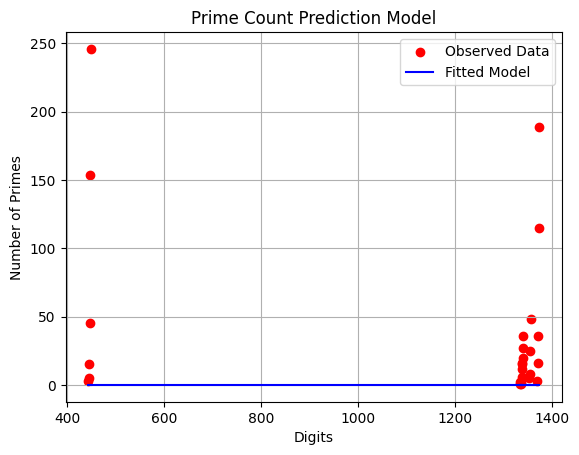

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data given
data = [
    (1334, 1, 19597), (1337, 1, 19597), (1338, 6, 19597), (1339, 15, 19597),
    (1340, 36, 19597), (1341, 27, 19597),
    (1334, 2, 1339), (1337, 2, 1339), (1338, 12, 1339), (1339, 16, 1339),
    (1340, 20, 1339),
    (1354, 5, 22076), (1355, 8, 22076), (1356, 25, 22076), (1357, 48, 22076),
    (1370, 3, 85617), (1371, 16, 85617), (1372, 36, 85617), (1373, 115, 85617),
    (1374, 189, 85617),
    (443, 3, 21222), (444, 5, 21222), (445, 15, 21222), (446, 45, 21222),
    (447, 154, 21222), (448, 246, 21222)
]

# Extract data
digits = np.array([d[0] for d in data])
primes = np.array([d[1] for d in data])
selections = np.array([d[2] for d in data])

# Define the prediction model
def prime_model(d, A, alpha):
    """Exponential model for prime prediction."""
    return A * np.exp(-alpha * d)

# Fit the model to data
params, _ = curve_fit(prime_model, digits, primes)
A, alpha = params

# Make predictions
def predict_primes(d, M):
    """Predicts the number of primes for d digits and M selected numbers."""
    return round(A * np.exp(-alpha * d) * M)

# Test the prediction
d_test = 1344
M_test = 2000
predicted_primes = predict_primes(d_test, M_test)

# Show results
print(f"Derived formula: P(d, M) = {A:.4e} * exp(-{alpha:.4e} * d) * M")
print(f"Predicted number of primes with {d_test} digits among {M_test} numbers: {predicted_primes}")

# Plot data and model fit
plt.scatter(digits, primes, color='red', label="Observed Data")
plt.plot(digits, prime_model(digits, A, alpha), color='blue', label="Fitted Model")
plt.xlabel("Digits")
plt.ylabel("Number of Primes")
plt.legend()
plt.grid(True)
plt.title("Prime Count Prediction Model")
plt.show()


In [37]:
import math

def boost_factor(d):
    """Calculate the boost factor for a given digit count."""
    if d <= 2:
        return 1  # Small digits behave differently
    return 10 * ((d - 2) / (d - 1))

def prime_probability(d):
    """Calculate the raw prime probability for d-digit numbers."""
    return 1 / (d * math.log(10))

def boosted_prime_probability(d):
    """Calculate the boosted prime probability, integrating the boost factor."""
    return boost_factor(d) * prime_probability(d)

def predict_primes(M, d):
    """Predict the number of primes among M numbers with d digits."""
    p_boosted = boosted_prime_probability(d)
    return M * p_boosted

def main():
    # Example data
    digit_counts = [443,560, 1334, 1339, 1357, 1374]
    M_values = [21222,51180, 19597, 1339, 22076, 85617]
    
    print("\n--- Prime Predictions ---\n")
    for d, M in zip(digit_counts, M_values):
        expected_primes = predict_primes(M, d)
        B = boost_factor(d)
        print(f"Digits: {d}, Numbers: {M}")
        print(f"  Boost Factor: {B:.3f}")
        print(f"  Predicted Primes: {expected_primes:.2f}")
        print("-" * 40)

if __name__ == "__main__":
    main()



--- Prime Predictions ---

Digits: 443, Numbers: 21222
  Boost Factor: 9.977
  Predicted Primes: 207.58
----------------------------------------
Digits: 560, Numbers: 51180
  Boost Factor: 9.982
  Predicted Primes: 396.20
----------------------------------------
Digits: 1334, Numbers: 19597
  Boost Factor: 9.992
  Predicted Primes: 63.75
----------------------------------------
Digits: 1339, Numbers: 1339
  Boost Factor: 9.993
  Predicted Primes: 4.34
----------------------------------------
Digits: 1357, Numbers: 22076
  Boost Factor: 9.993
  Predicted Primes: 70.60
----------------------------------------
Digits: 1374, Numbers: 85617
  Boost Factor: 9.993
  Predicted Primes: 270.42
----------------------------------------
